# GOTTA CATCH'EM ALL

**In this notebook, I will use Seaborn library to visualize pokemon data**

**Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.**

**You can visit the doc from <a href="https://seaborn.pydata.org/index.html" >here</a> to get more help if you need from**

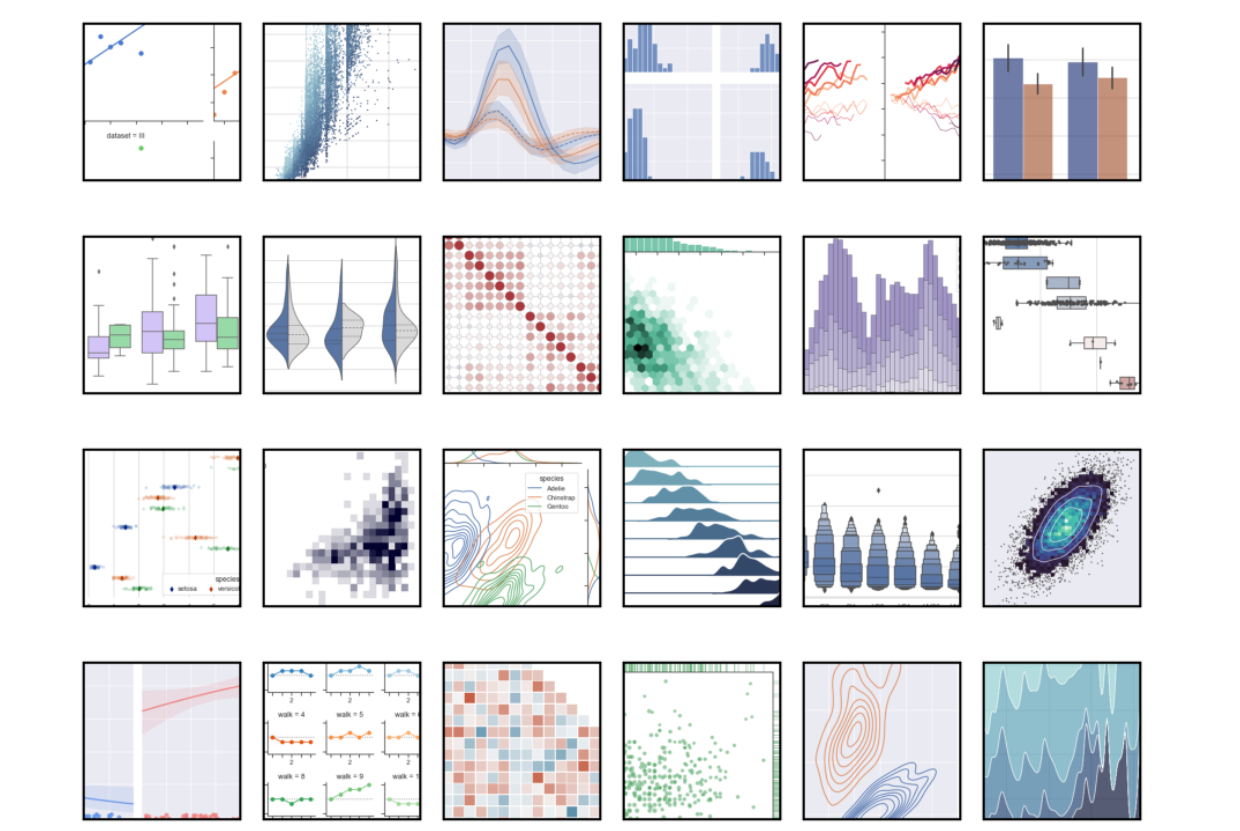

**Table of Contents**
* Plots

    - [Lmplot](#lm)
    - [Heatmap](#heatmap)
    - [Boxplot](#box)
    - [Distplot](#dist)
    - [Kdeplot](#kde)
    - [Violinplot](#violin)
    - [Swarmplot](#swarm)
    - [PieChart](#pie)
    - [Countplot](#count)
    - [Jointplot](#joint)
    - [Pairplot](#pair)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pokemon/Pokemon.csv


In [3]:
df = pd.read_csv('../input/pokemon/Pokemon.csv', index_col=False)

# We read pokemon.csv through 'Pandas'.read_csv(x) function
# param: x is the path of the csv file
# Then we assign dataframe as df(name can differ)

In [4]:
df.head()
# .head() gives you the first 5 rows of the dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.tail()
# .tail() gives you the last 5 rows of the dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
df.sample(10) # You can change to number to your personal choise
# .sample() provides random rows of data 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
757,687,Malamar,Dark,Psychic,482,86,92,88,68,75,73,6,False
127,118,Goldeen,Water,NaN,320,45,67,60,35,50,63,1,False
179,165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False
212,197,Umbreon,Dark,NaN,525,95,65,110,60,130,65,2,False
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
511,460,AbomasnowMega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,False
251,232,Donphan,Ground,NaN,500,90,120,120,60,60,50,2,False
25,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [8]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
df_leg =df[df['Legendary']==True]  #Showing the legendary pokemons

In [10]:
df_leg_1 = df_leg[df_leg['Generation'] == 1]
df_leg_1
# First Generation Legendary Pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [11]:
df_leg_2 = df_leg[df_leg['Generation'] == 2]
df_leg_2
# Second Generation Legendary Pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


In [12]:
df_strongest = df[df['Attack'] > 170]
df_strongest

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


**Strongest Pokemon is : MewtwoMega Mewtwo X**

In [13]:
df_fastest = df[df['Speed'] > 150]
df_fastest

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


**Fastest Pokemon is : DeoxysSpeed Forme**

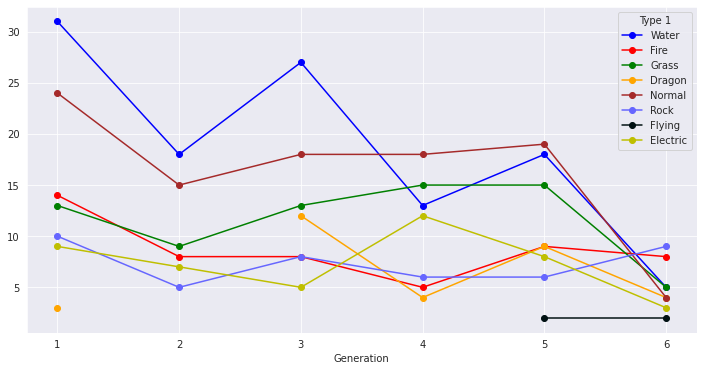

In [14]:
a=df.groupby(['Generation','Type 1']).count().reset_index()
a=a[['Generation','Type 1','Total']]
a=a.pivot('Generation','Type 1','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<a id="lm"></a>
# Lmplot

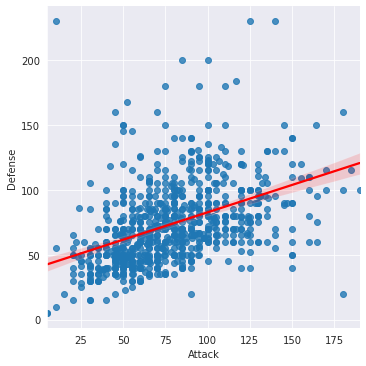

In [15]:
sns.lmplot(x='Attack', y='Defense', data=df, line_kws={'color': 'red'})

<Figure size 1080x720 with 0 Axes>

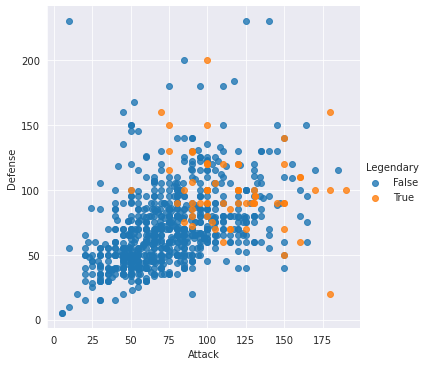

In [16]:
plt.figure(figsize=(15,10))
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Legendary')

<a id="heatmap"></a>
# Heatmap

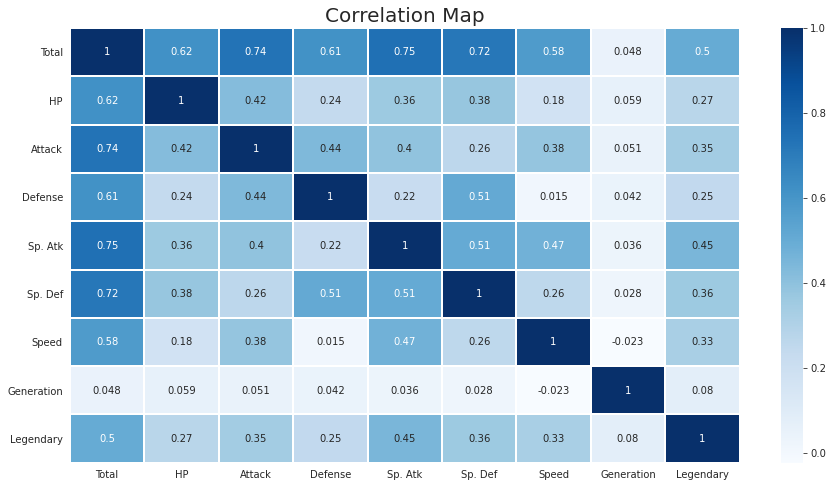

In [17]:
# Correlation map
plt.rcParams['figure.figsize']=(15,8)
heat_map = sns.heatmap(df[[ 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr(), annot = True, linewidths=1, cmap='Blues')
heat_map.set_title(label='Correlation Map', fontsize=20)
heat_map;


<a id="box"></a>
# Box Plot

<AxesSubplot:>

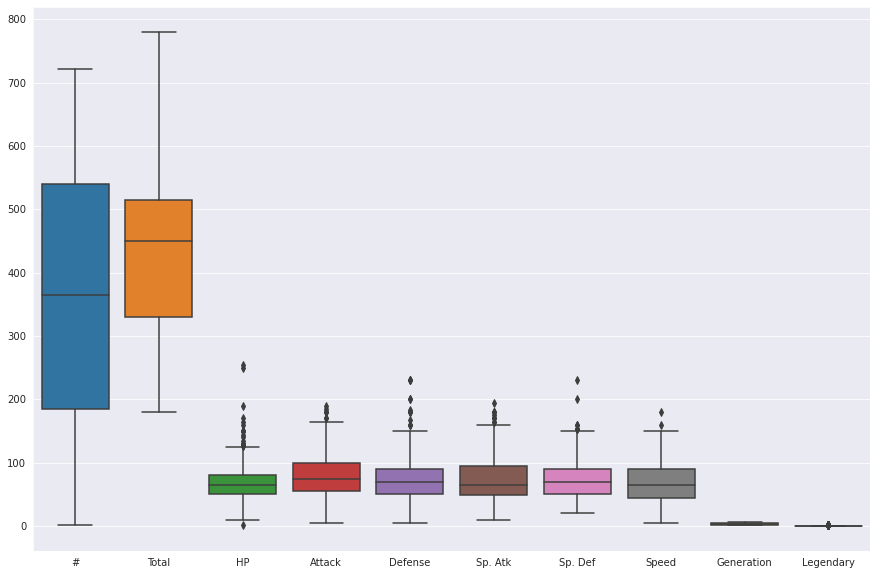

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<AxesSubplot:>

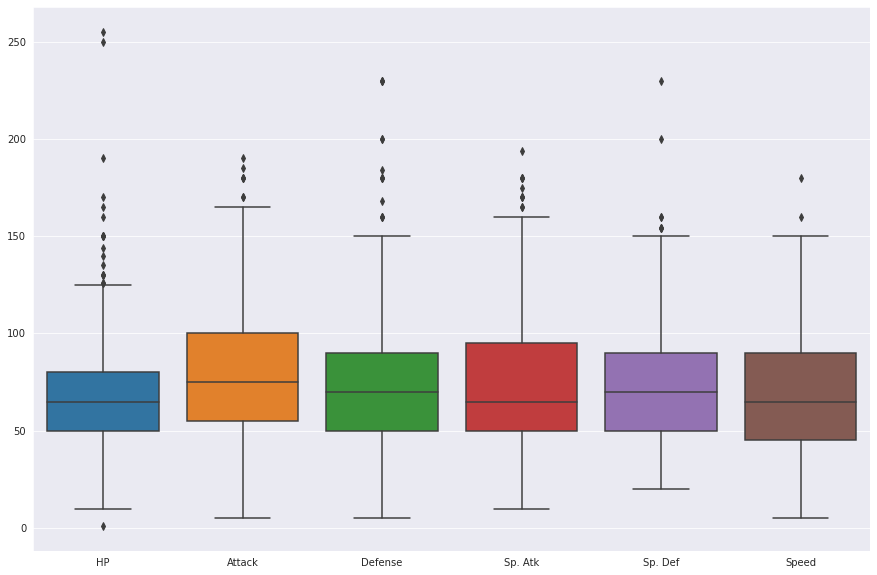

In [19]:
stats_df = df.drop(['Total', 'Legendary', 'Generation', '#'], axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(data=stats_df)

In [20]:
stats_df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80


<a id="dist"></a>
# Dist Plot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


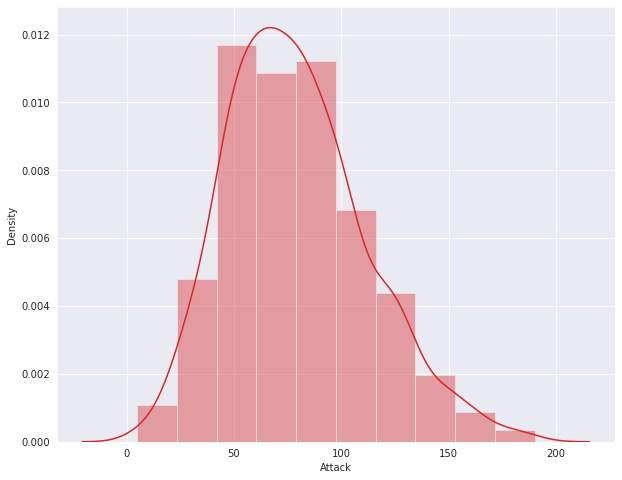

In [21]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Attack']
ax = sns.distplot(x, bins=10, color="tab:red")
plt.show()
# This is some kind of histogram grap about Attack

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


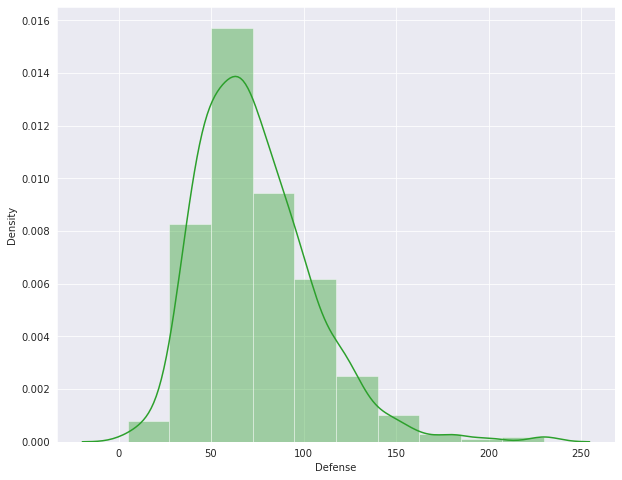

In [22]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Defense']
ax = sns.distplot(x, bins=10, color="tab:green")
plt.show()
# This is some kind of histogram grap about Defense

<a id="kde"></a>
# Kde Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


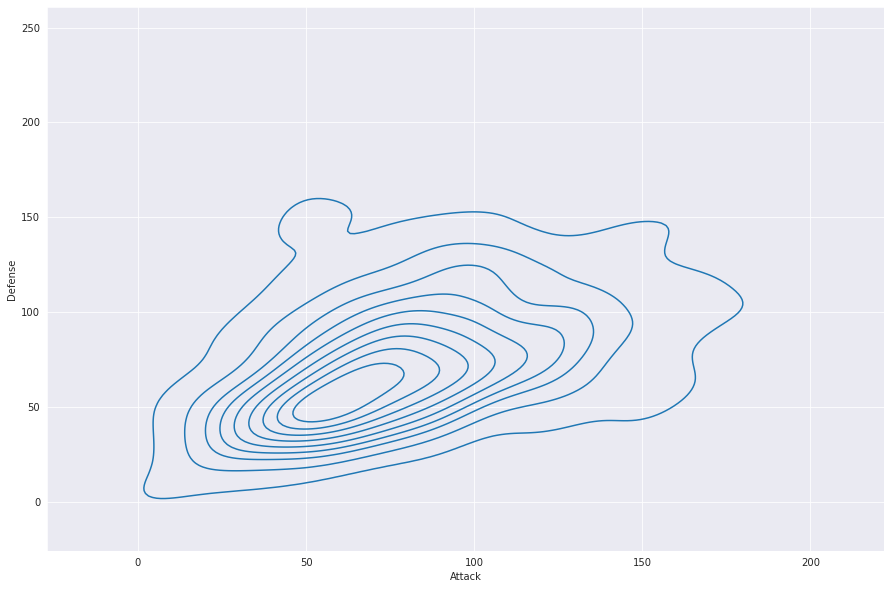

In [23]:
plt.figure(figsize=(15,10))
sns.kdeplot(df.Attack, df.Defense)
plt.show()

**You can get the color codes of pokemon types from <a href= https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates> Bulbapedia </a> to help us create a new color palette**

In [24]:
pkmn_type_colors = ['#78C850', # Grass
                    '#F08030', # Fire
                    '#6890F0', # Water
                    '#A8B820', # Bug
                    '#A8A878', # Normal
                    '#A040A0', # Poison
                    '#F8D030', # Electric
                    '#E0C068', # Ground
                    '#EE99AC', # Fairy
                    '#C03028', # Figthing
                    '#F85888', # Psychic
                    '#B8A038', # Rock
                    '#705898', # Ghost
                    '#98D8D8', # Ice
                    '#7038F8', # Dragon
                   
                   ]

<a id="violin"></a>
# Violinplot

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

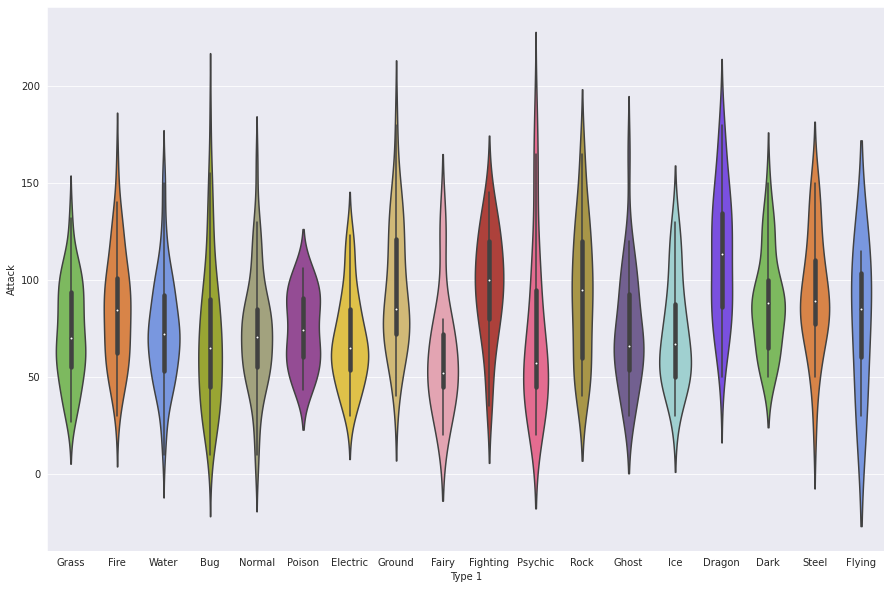

In [25]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'Type 1', y='Attack', data=df, palette=pkmn_type_colors)


<a id="swarm"></a>
# Swarmplot

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

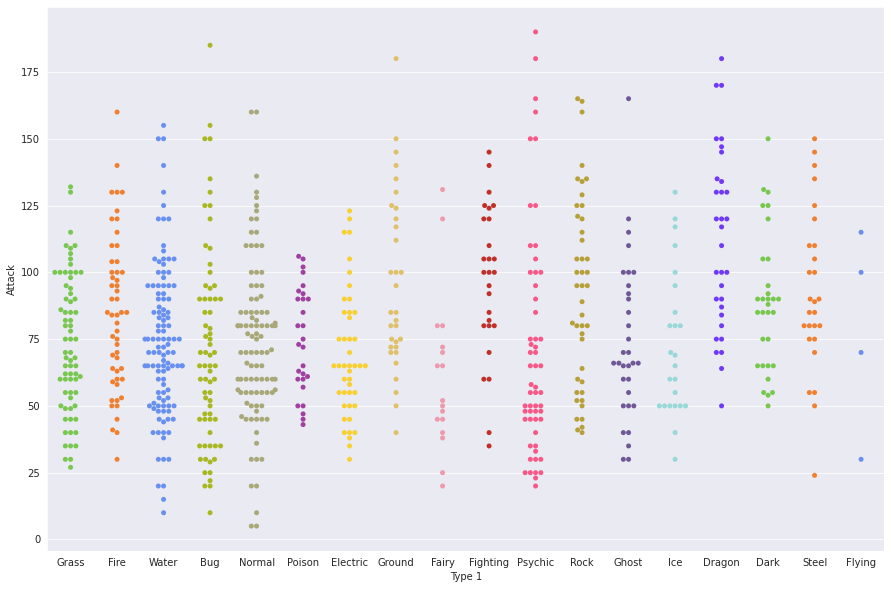

In [26]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Defense'>

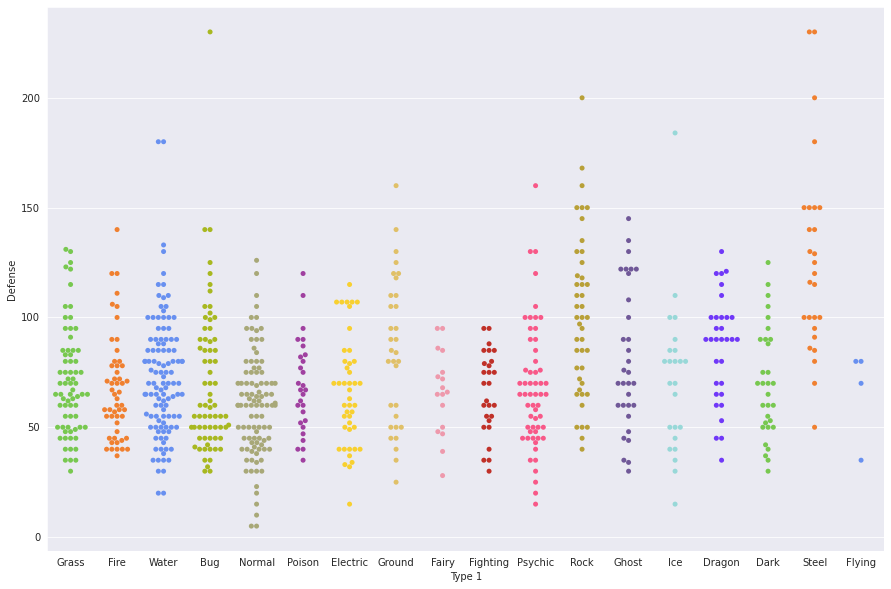

In [27]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Defense', data=df, palette=pkmn_type_colors)


<a id="pie"></a>
# Pie Chart

Text(0.5, 1.0, 'Pokemon According to Type-1')

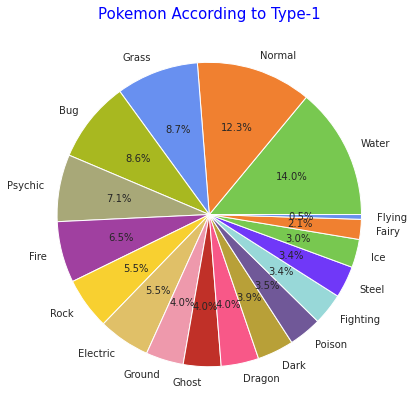

In [28]:
#kill.race.dropna(inplace = True)
labels = df['Type 1'].value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df['Type 1'].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=pkmn_type_colors, autopct='%1.1f%%')
plt.title('Pokemon According to Type-1',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Pokemon According to Type-2')

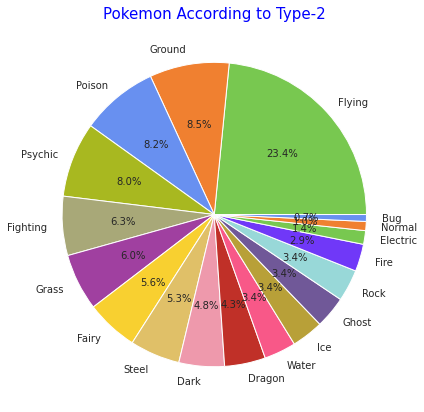

In [29]:
#df_type2 = df['Type 2'].dropna(inplace = True)
labels = df['Type 2'].value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df['Type 2'].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors = pkmn_type_colors, autopct='%1.1f%%')
plt.title('Pokemon According to Type-2',color = 'blue',fontsize = 15)

<a id="count"></a>
# Count Plot

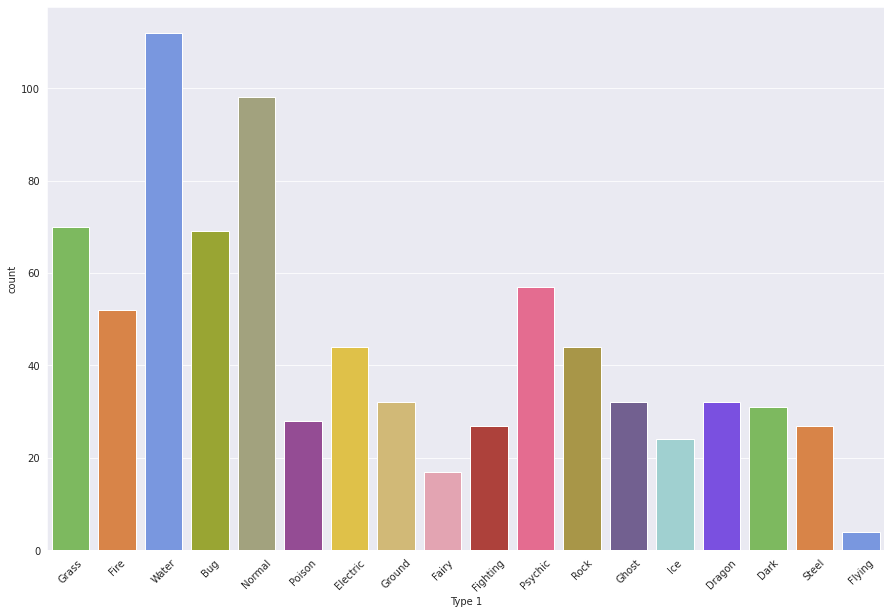

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation = 45)
plt.show()

Most Seen First Types of Pokemons
* Water
* Normal
* Grass
* Bug
* Psychic

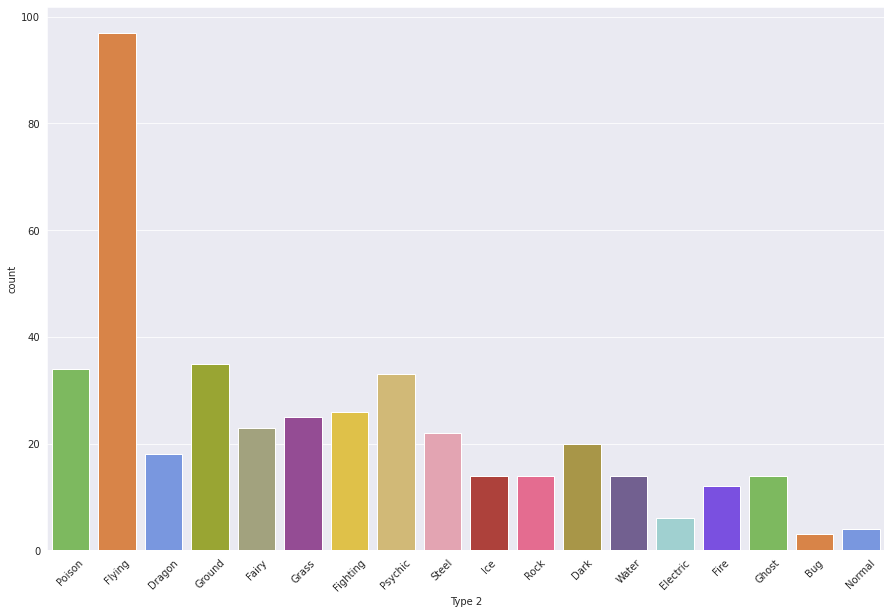

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(x='Type 2', data=df, palette=pkmn_type_colors)
plt.xticks(rotation = 45)
plt.show()

Most Seen Second Types of Pokemons
* Flying
* Ground
* Poison
* Psychic
* Fighting

<a id="joint"></a>
# Joint Plot

<Figure size 1080x720 with 0 Axes>

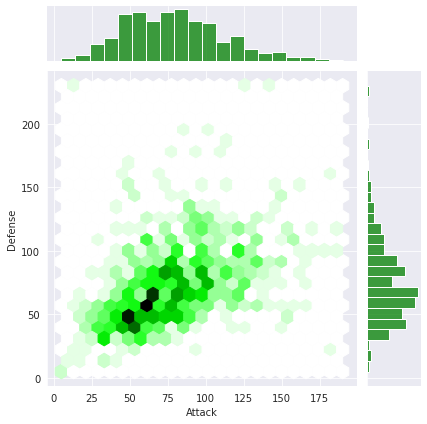

In [32]:
plt.figure(figsize=(15,10))
sns.jointplot(x='Attack', y='Defense', kind='hex', data=df , color= 'green')
plt.show()

<Figure size 1080x576 with 0 Axes>

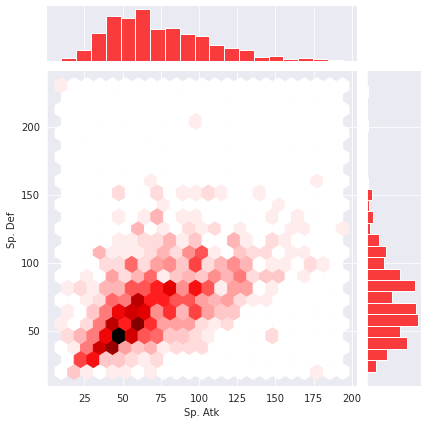

In [33]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=df,kind ="hex",color = 'red'); #comparing special attack and speed

<a id="pair"></a>
# Pair Plot

<Figure size 1080x720 with 0 Axes>

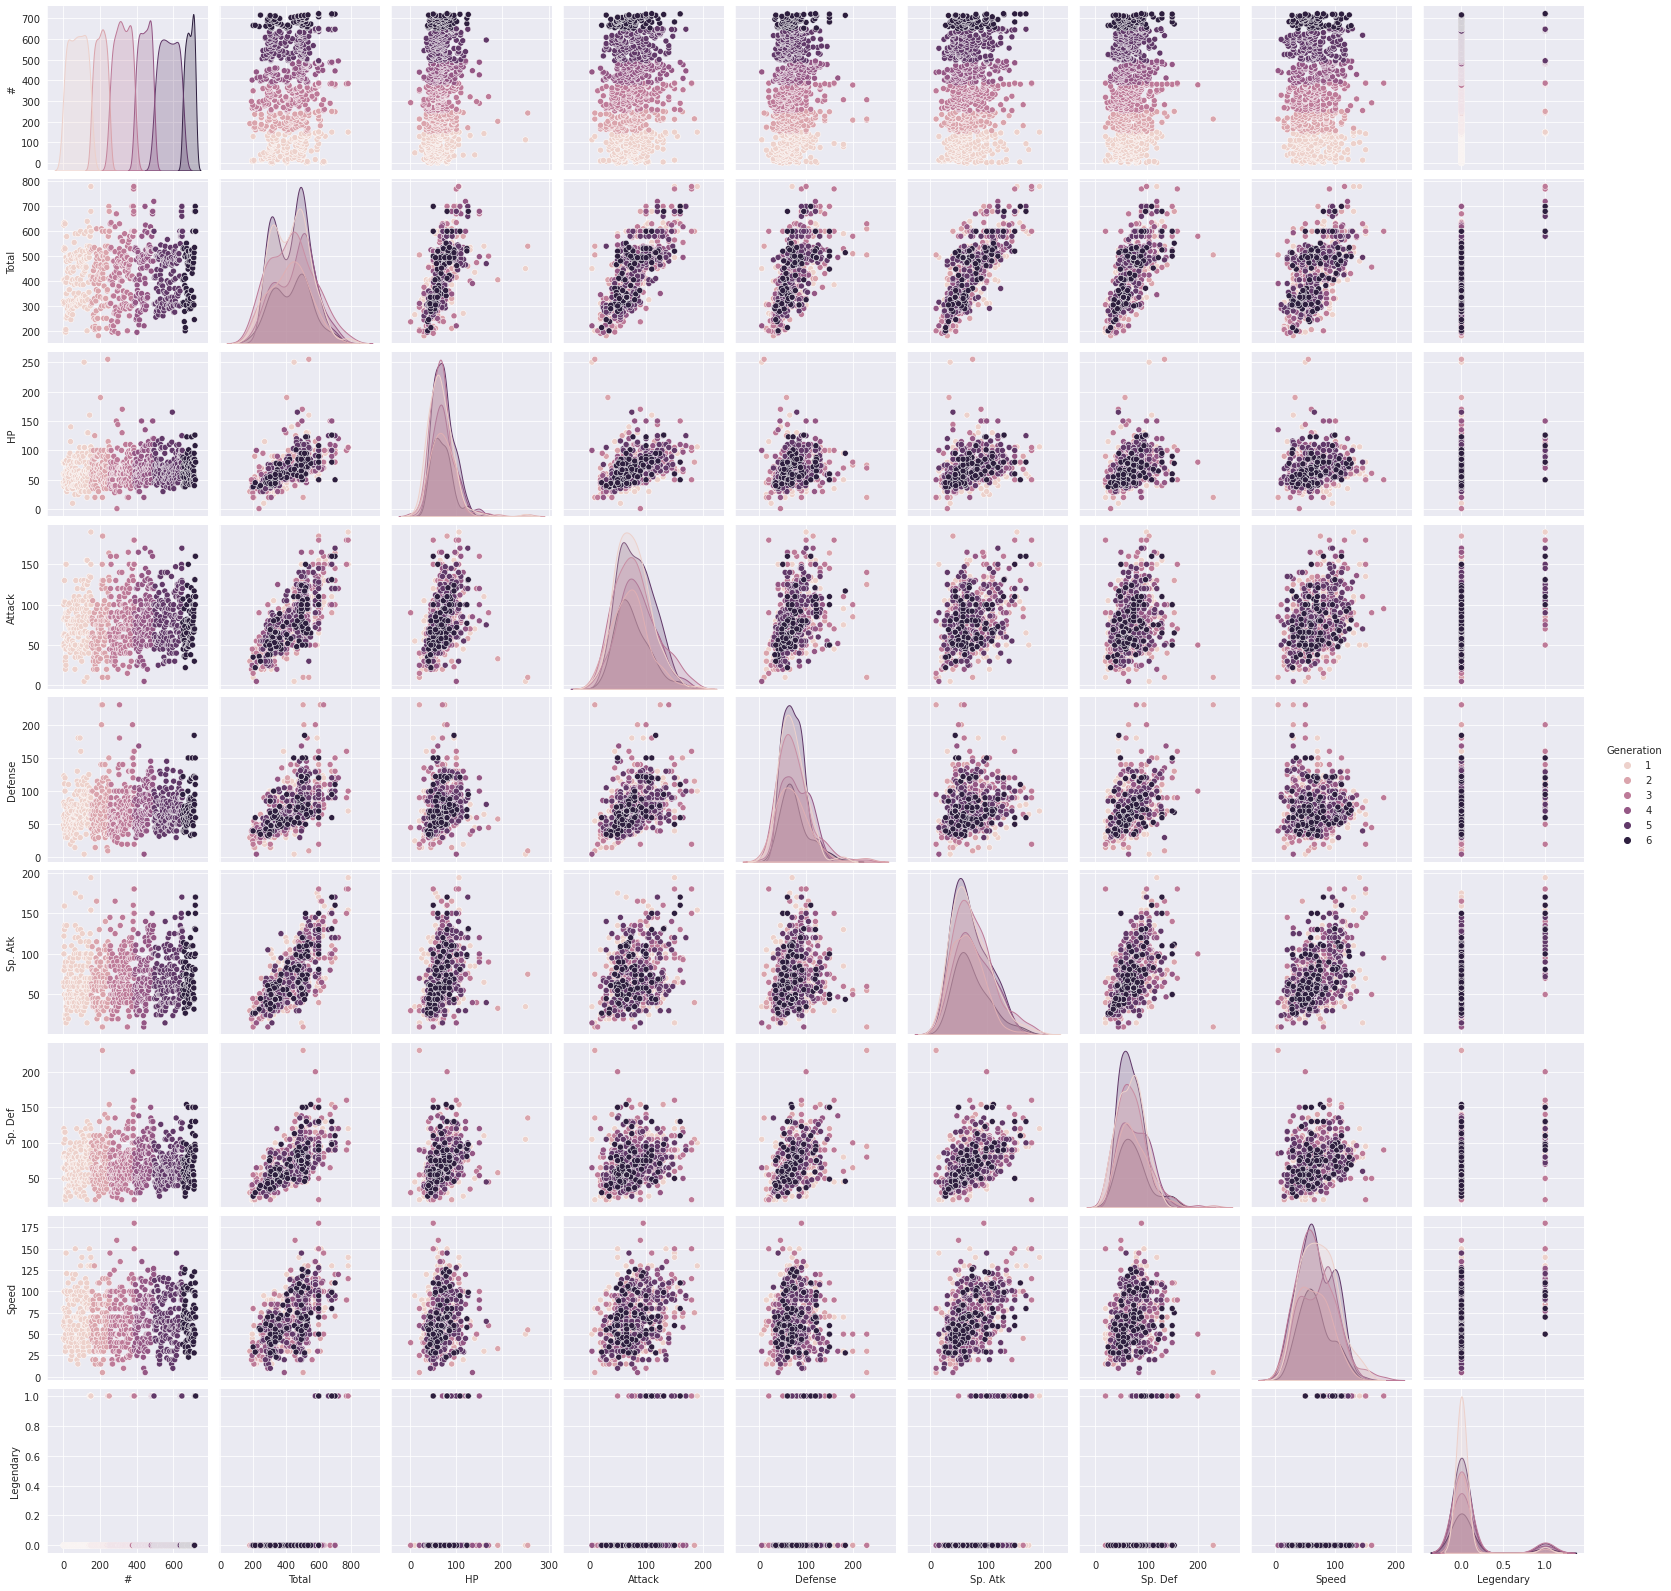

In [34]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df, hue = 'Generation')
plt.show()

# Thank you for reading


# If you enjoyed my work, please consider upvoting


# More of my work:

**Stroke EDA and Classification(%94.60 Accuracy)**

- https://www.kaggle.com/umutalpaydn/stroke-eda-and-classification-94-60-accuracy

**Heart-Disease Analysis & Classification**

- https://www.kaggle.com/umutalpaydn/heart-disease-analysis-classification

**VideoGameSales EDA**

- https://www.kaggle.com/umutalpaydn/videogamesales-eda

**Iris Classification KNN & Logistic Regression**

- https://www.kaggle.com/umutalpaydn/iris-classification-knn-logistic-regression